In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import pearsonr 
from sklearn.neural_network import MLPClassifier
import statistics
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import lightgbm as lgb

In [2]:
train = pd.read_csv("C:\\Users\\PIRUNTHAPAN\\Desktop\\EC9560 Data Mining\\train.csv")
test = pd.read_csv("C:\\Users\\PIRUNTHAPAN\\Desktop\\EC9560 Data Mining\\test.csv")

In [3]:
print("Train = " ,train.shape)
print("Test = " ,test.shape)

Train =  (88858, 10)
Test =  (59310, 9)


In [4]:
print("Train Information")
print(train.info())
print("\nTest Information")
print(test.info())

Train Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
None

Test Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   No

In [5]:
x=[]
counter = 0
for y in train:
    if(counter != 0):
        x.append(y)
        print(y)
    counter=counter+1

Estimated_Insects_Count
Crop_Type
Soil_Type
Pesticide_Use_Category
Number_Doses_Week
Number_Weeks_Used
Number_Weeks_Quit
Season
Crop_Damage


Text(0.5, 0, 'Estimated_Insects_Count')

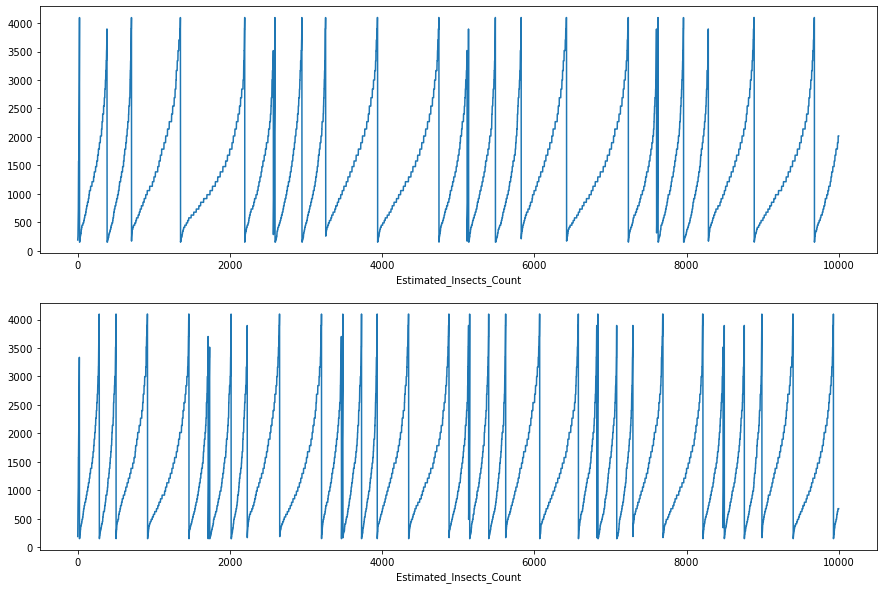

In [6]:
plt.subplot(2,1,1)
train[x[0]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[0])
plt.subplot(2,1,2)
test[x[0]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[0])

Text(0.5, 0, 'Crop_Type')

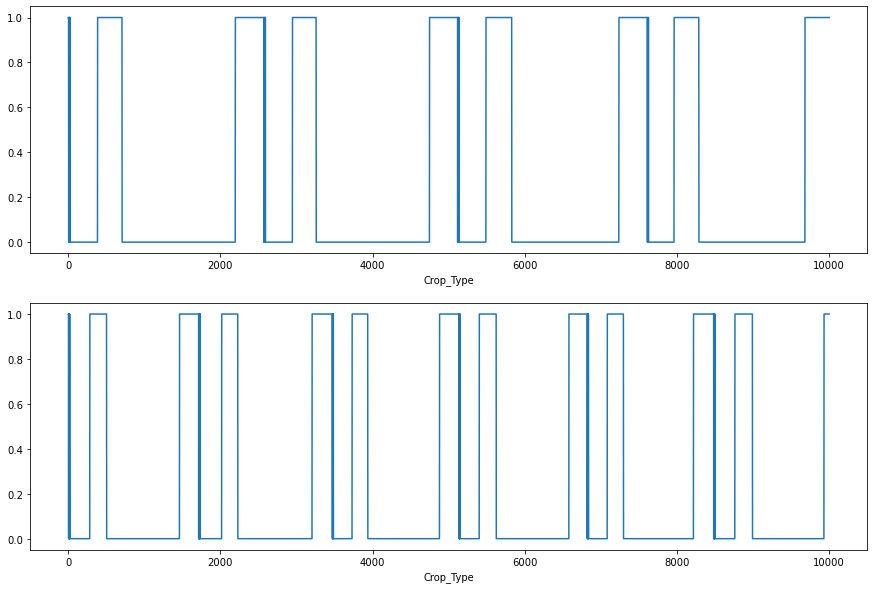

In [7]:
plt.subplot(2,1,1)
train[x[1]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[1])
plt.subplot(2,1,2)
test[x[1]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[1])

Text(0.5, 0, 'Soil_Type')

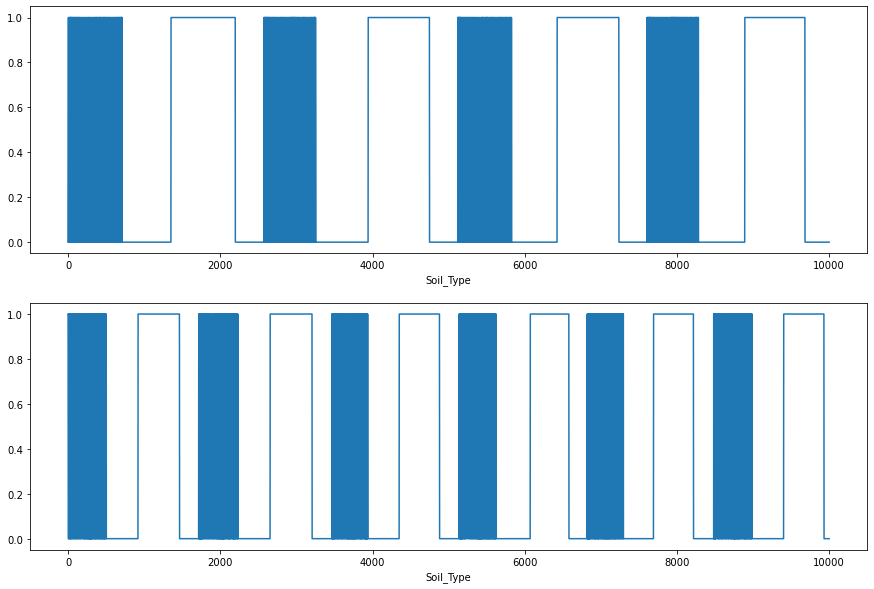

In [8]:
plt.subplot(2,1,1)
train[x[2]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[2])
plt.subplot(2,1,2)
test[x[2]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[2])

Text(0.5, 0, 'Pesticide_Use_Category')

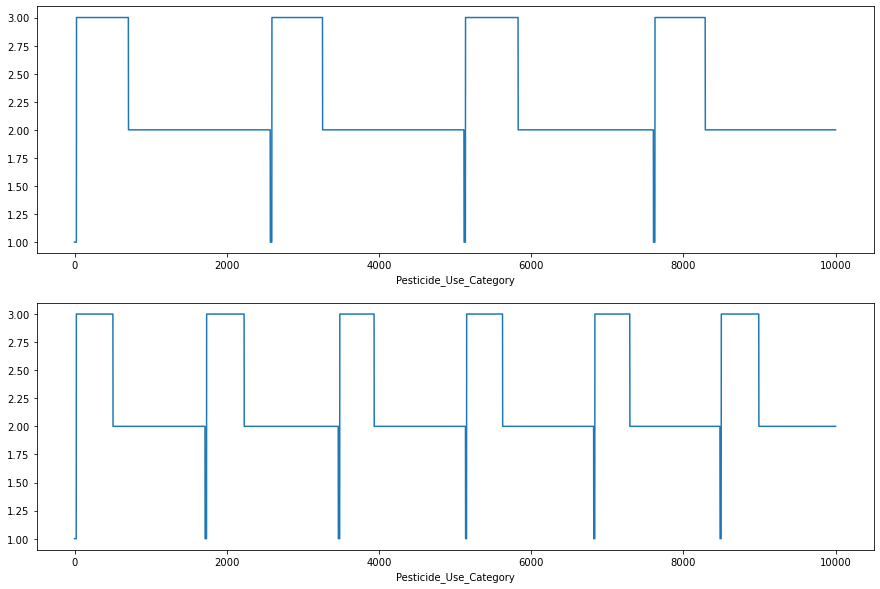

In [9]:
plt.subplot(2,1,1)
train[x[3]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[3])
plt.subplot(2,1,2)
test[x[3]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[3])

Text(0.5, 0, 'Number_Doses_Week')

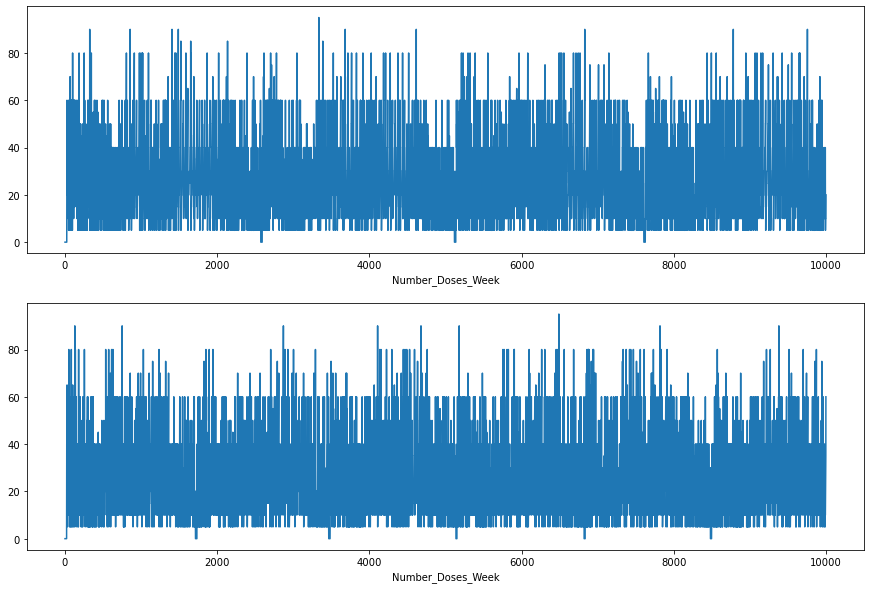

In [10]:
plt.subplot(2,1,1)
train[x[4]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[4])
plt.subplot(2,1,2)
test[x[4]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[4])

Text(0.5, 0, 'Number_Weeks_Used')

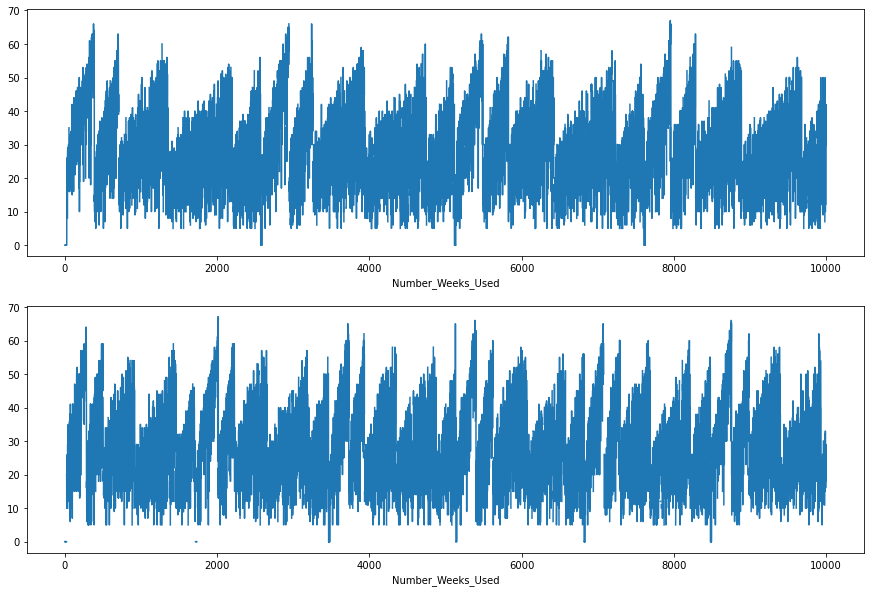

In [11]:
plt.subplot(2,1,1)
train[x[5]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[5])
plt.subplot(2,1,2)
test[x[5]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[5])

Text(0.5, 0, 'Number_Weeks_Quit')

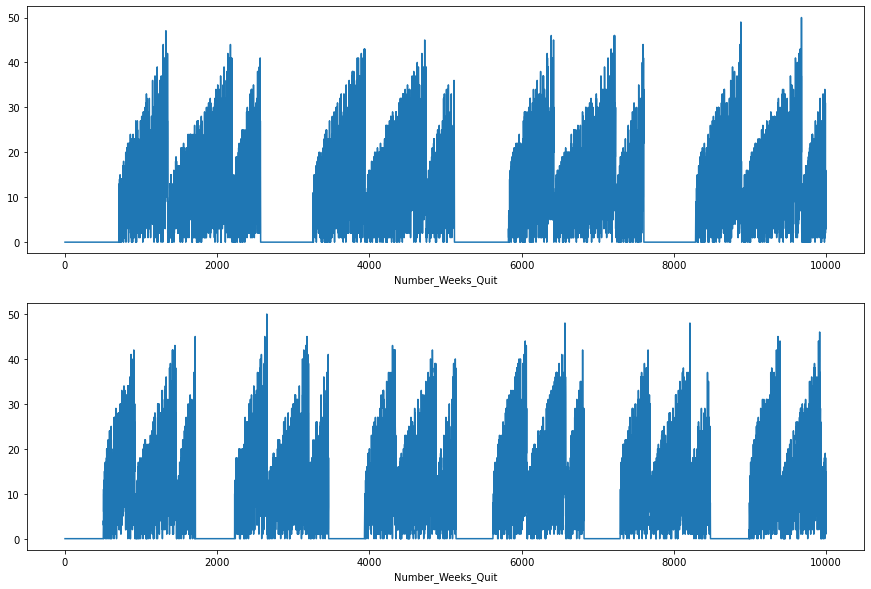

In [12]:
plt.subplot(2,1,1)
train[x[6]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[6])
plt.subplot(2,1,2)
test[x[6]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[6])

Text(0.5, 0, 'Season')

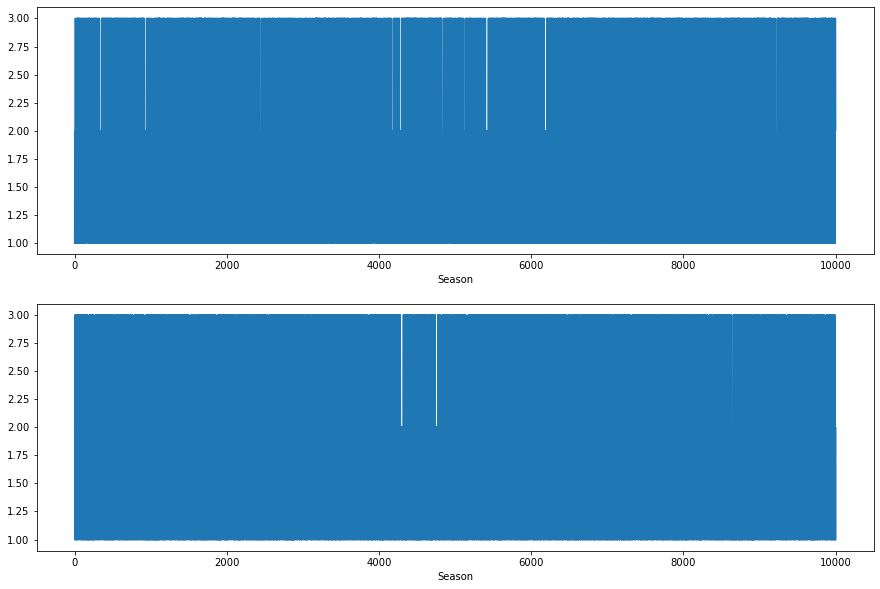

In [13]:
plt.subplot(2,1,1)
train[x[7]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[7])
plt.subplot(2,1,2)
test[x[7]].head(10000).plot(figsize=(15, 10))
plt.xlabel(x[7])

Text(0.5, 0, 'Crop_Damage')

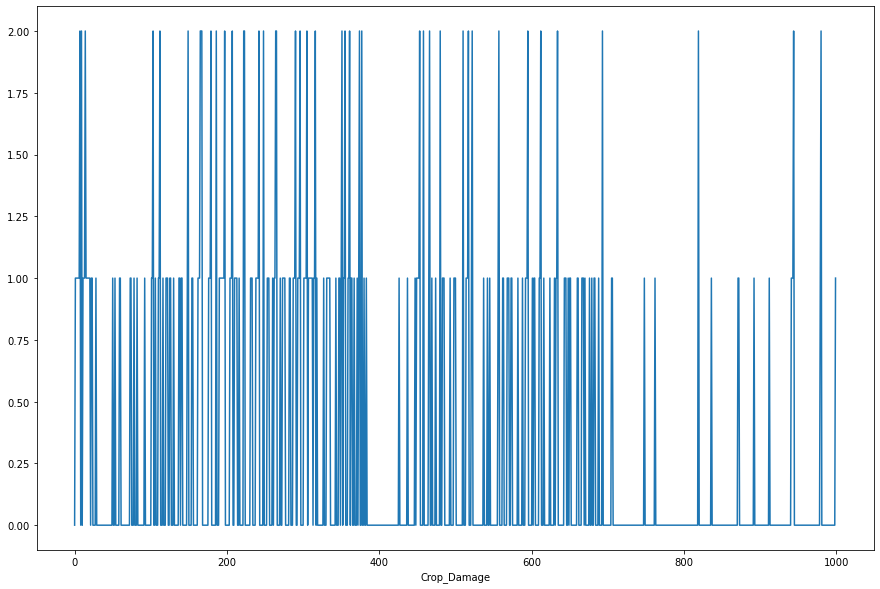

In [14]:
train[x[8]].head(1000).plot(figsize=(15, 10))
plt.xlabel(x[8])

In [15]:
# with the visualization of the data, Time series alanysis is the key to achieve higher accury, any way just test with classification algorithm

In [16]:
train['train_or_test']='train'
test['train_or_test']='test'
test['Crop_Damage']= 0
all=pd.concat([train,test])

In [17]:
all.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
train_or_test               object
dtype: object

In [18]:
feature_cols = train.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Crop_Damage')
feature_cols.remove('train_or_test')
label_col = 'Crop_Damage'
print(feature_cols)

['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season']


In [19]:
all['ID_value'] = all['ID'].apply(lambda x: x.strip('F')).astype('int')

In [20]:
all = all.sort_values(['ID_value'])

In [21]:
all = all.reset_index(drop=True)

In [22]:
#Setting Crop_Damage=-999 for missing values
all.loc[all['train_or_test'] == 'test', 'Crop_Damage'] = -999

In [23]:
all['Estimated_Insects_Count_lag1'] = all['Estimated_Insects_Count'].shift(fill_value=-999)
all['Estimated_Insects_Count_lag2'] = all['Estimated_Insects_Count'].shift(periods=2,fill_value=-999)

all['Estimated_Insects_Count_Damage'] = all.sort_values(['ID_value']).groupby(['Estimated_Insects_Count'])['Crop_Damage'].apply(lambda x: x.shift().rolling(5, min_periods=1).mean()).fillna(-999).values
all['Estimated_Insects_Count_Damage_lag2'] = all.sort_values(['ID_value']).groupby(['Estimated_Insects_Count'])['Crop_Damage'].apply(lambda x: x.shift(periods=2).rolling(5, min_periods=1).mean()).fillna(-999).values

all['Crop_Type_lag1'] = all['Crop_Type'].shift(fill_value=-999)
all['Crop_Type_lag2'] = all['Crop_Type'].shift(fill_value=-999)

all['Crop_Type_Damage'] = all.sort_values(['ID_value']).groupby(['Crop_Type'])['Crop_Damage'].apply(lambda x: x.shift().rolling(5, min_periods=1).mean()).fillna(-999).values
all['Crop_Type_Damage_lag2'] = all.sort_values(['ID_value']).groupby(['Crop_Type'])['Crop_Damage'].apply(lambda x: x.shift(periods=2).rolling(5, min_periods=1).mean()).fillna(-999).values

all['Soil_Type_lag1'] = all['Soil_Type'].shift(fill_value=-999)
all['Soil_Type_lag2'] = all['Soil_Type'].shift(fill_value=-999)

all['Soil_Type_Damage'] = all.sort_values(['ID_value']).groupby(['Soil_Type'])['Crop_Damage'].apply(lambda x: x.shift().rolling(5, min_periods=1).mean()).fillna(-999).values
all['Soil_Type_Damage_lag2'] = all.sort_values(['ID_value']).groupby(['Soil_Type'])['Crop_Damage'].apply(lambda x: x.shift(periods=2).rolling(5, min_periods=1).mean()).fillna(-999).values

all['Pesticide_Use_Category_lag1'] = all['Pesticide_Use_Category'].shift(fill_value=-999)
all['Pesticide_Use_Category_lag2'] = all['Pesticide_Use_Category'].shift(periods=2,fill_value=-999)

all['Pesticide_Use_Category_Damage'] = all.sort_values(['ID_value']).groupby(['Pesticide_Use_Category'])['Crop_Damage'].apply(lambda x: x.shift().rolling(5, min_periods=1).mean()).fillna(-999).values
all['Pesticide_Use_Category_Damage_lag2'] = all.sort_values(['ID_value']).groupby(['Pesticide_Use_Category'])['Crop_Damage'].apply(lambda x: x.shift(periods=2).rolling(5, min_periods=1).mean()).fillna(-999).values

all['Number_Doses_Week_lag1'] = all['Number_Doses_Week'].shift(fill_value=-999)
all['Number_Doses_Week_lag2'] = all['Number_Doses_Week'].shift(periods=2,fill_value=-999)

all['Number_Weeks_Used_lag1'] = all['Number_Weeks_Used'].shift(fill_value=-999)
all['Number_Weeks_Used_lag2'] = all['Number_Weeks_Used'].shift(periods=2,fill_value=-999)

all['Number_Weeks_Quit_lag1'] = all['Number_Weeks_Quit'].shift(fill_value=-999)
all['Number_Weeks_Quit_lag2'] = all['Number_Weeks_Quit'].shift(periods=2,fill_value=-999)

all['Season_lag1'] = all['Season'].shift(fill_value=-999)
all['Season_lag2'] = all['Season'].shift(periods=2,fill_value=-999)

all['Season_Damage'] = all.sort_values(['ID_value']).groupby(['Season'])['Crop_Damage'].apply(lambda x: x.shift().rolling(5, min_periods=1).mean()).fillna(-999).values
all['Season_Damage_lag2'] = all.sort_values(['ID_value']).groupby(['Season'])['Crop_Damage'].apply(lambda x: x.shift(periods=2).rolling(5, min_periods=1).mean()).fillna(-999).values

all['Crop_Damage_lag1'] = all['Crop_Damage'].shift(fill_value=-999)
all['Crop_Damage_lag2'] = all['Crop_Damage'].shift(periods=2,fill_value=-999)

In [24]:
train, test = all[all.train_or_test == 'train'], all[all.train_or_test == 'test']

In [25]:
train.drop(['train_or_test'], inplace=True, axis=1)
test.drop(['train_or_test'], inplace=True, axis=1)
test.drop([label_col], inplace=True, axis=1)

C:\Users\PIRUNTHAPAN\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [26]:
print(train.shape, test.shape)

(88858, 39) (59310, 38)


In [27]:
del all

In [28]:
missing_impute = -999

In [29]:
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].apply(lambda x: missing_impute if pd.isna(x) else x)
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].apply(lambda x: missing_impute if pd.isna(x) else x)

train['Number_Weeks_Used_lag1'] = train['Number_Weeks_Used_lag1'].apply(lambda x: missing_impute if pd.isna(x) else x)
test['Number_Weeks_Used_lag1'] = test['Number_Weeks_Used_lag1'].apply(lambda x: missing_impute if pd.isna(x) else x)

train['Number_Weeks_Used_lag2'] = train['Number_Weeks_Used_lag2'].apply(lambda x: missing_impute if pd.isna(x) else x)
test['Number_Weeks_Used_lag2'] = test['Number_Weeks_Used_lag2'].apply(lambda x: missing_impute if pd.isna(x) else x)

In [30]:
feature_cols = train.columns.tolist()
feature_cols.remove('ID')
feature_cols.remove('Crop_Damage')
feature_cols.remove('ID_value')
label_col = 'Crop_Damage'
print(feature_cols)

['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season', 'Estimated_Insects_Count_lag1', 'Estimated_Insects_Count_lag2', 'Estimated_Insects_Count_Damage', 'Estimated_Insects_Count_Damage_lag2', 'Crop_Type_lag1', 'Crop_Type_lag2', 'Crop_Type_Damage', 'Crop_Type_Damage_lag2', 'Soil_Type_lag1', 'Soil_Type_lag2', 'Soil_Type_Damage', 'Soil_Type_Damage_lag2', 'Pesticide_Use_Category_lag1', 'Pesticide_Use_Category_lag2', 'Pesticide_Use_Category_Damage', 'Pesticide_Use_Category_Damage_lag2', 'Number_Doses_Week_lag1', 'Number_Doses_Week_lag2', 'Number_Weeks_Used_lag1', 'Number_Weeks_Used_lag2', 'Number_Weeks_Quit_lag1', 'Number_Weeks_Quit_lag2', 'Season_lag1', 'Season_lag2', 'Season_Damage', 'Season_Damage_lag2', 'Crop_Damage_lag1', 'Crop_Damage_lag2']


In [31]:
cat_cols = ['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season', 'Crop_Type_lag1', 'Soil_Type_lag1', 'Pesticide_Use_Category_lag1', 'Season_lag1']

In [32]:
params = {}
params['learning_rate'] = 0.04
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.44, 1: 0.4, 2: 0.37}

In [33]:
from sklearn.model_selection import train_test_split
df_train, df_eval = train_test_split(train, test_size=0.40, random_state=42, shuffle=True, stratify=train[label_col])

In [34]:
clf = lgb.LGBMClassifier(**params)
    
clf.fit(df_train[feature_cols], df_train[label_col], early_stopping_rounds=100, eval_set=[(df_train[feature_cols], df_train[label_col]), (df_eval[feature_cols], df_eval[label_col])], eval_metric='multi_error', verbose=True, categorical_feature=cat_cols)

eval_score = accuracy_score(df_eval[label_col], clf.predict(df_eval[feature_cols]))

print('Eval ACC: {}'.format(eval_score))

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55


C:\Users\PIRUNTHAPAN\anaconda3\envs\tf-gpu\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PIRUNTHAPAN\anaconda3\envs\tf-gpu\lib\site-packages\lightgbm\basic.py:1706: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Crop_Type', 'Crop_Type_lag1', 'Pesticide_Use_Category', 'Pesticide_Use_Category_lag1', 'Season', 'Season_lag1', 'Soil_Type', 'Soil_Type_lag1']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\PIRUNTHAPAN\anaconda3\envs\tf-gpu\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\PIRUNTHAPAN\anaconda3\envs\tf-gpu\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.form

[1]	valid_0's multi_error: 0.164535	valid_0's multi_logloss: 0.499485	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.499867
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.164535	valid_0's multi_logloss: 0.475549	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.476172
[3]	valid_0's multi_error: 0.164535	valid_0's multi_logloss: 0.455395	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.456433
[4]	valid_0's multi_error: 0.164535	valid_0's multi_logloss: 0.440949	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.442431
[5]	valid_0's multi_error: 0.164535	valid_0's multi_logloss: 0.426679	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.428322
[6]	valid_0's multi_error: 0.164535	valid_0's multi_logloss: 0.411462	valid_1's multi_error: 0.164528	valid_1's multi_logloss: 0.413274
[7]	valid_0's multi_error: 0.164535	valid_0's multi_logloss: 0.399521	valid_1's multi_error: 0.164528	valid_1's multi_logl

[68]	valid_0's multi_error: 0.0708257	valid_0's multi_logloss: 0.204916	valid_1's multi_error: 0.0737115	valid_1's multi_logloss: 0.215757
[69]	valid_0's multi_error: 0.0704693	valid_0's multi_logloss: 0.203876	valid_1's multi_error: 0.073402	valid_1's multi_logloss: 0.214848
[70]	valid_0's multi_error: 0.0703192	valid_0's multi_logloss: 0.202887	valid_1's multi_error: 0.0729518	valid_1's multi_logloss: 0.213971
[71]	valid_0's multi_error: 0.0701504	valid_0's multi_logloss: 0.202106	valid_1's multi_error: 0.0728112	valid_1's multi_logloss: 0.213342
[72]	valid_0's multi_error: 0.0696252	valid_0's multi_logloss: 0.201097	valid_1's multi_error: 0.0724736	valid_1's multi_logloss: 0.212468
[73]	valid_0's multi_error: 0.0693814	valid_0's multi_logloss: 0.200175	valid_1's multi_error: 0.0721078	valid_1's multi_logloss: 0.211652
[74]	valid_0's multi_error: 0.0691376	valid_0's multi_logloss: 0.199486	valid_1's multi_error: 0.0718827	valid_1's multi_logloss: 0.211131
[75]	valid_0's multi_error: 

[129]	valid_0's multi_error: 0.0577709	valid_0's multi_logloss: 0.16547	valid_1's multi_error: 0.0634425	valid_1's multi_logloss: 0.184724
[130]	valid_0's multi_error: 0.0577522	valid_0's multi_logloss: 0.165212	valid_1's multi_error: 0.0634144	valid_1's multi_logloss: 0.184619
[131]	valid_0's multi_error: 0.0575271	valid_0's multi_logloss: 0.164696	valid_1's multi_error: 0.0632737	valid_1's multi_logloss: 0.184269
[132]	valid_0's multi_error: 0.057377	valid_0's multi_logloss: 0.164277	valid_1's multi_error: 0.0631893	valid_1's multi_logloss: 0.184001
[133]	valid_0's multi_error: 0.0569832	valid_0's multi_logloss: 0.163672	valid_1's multi_error: 0.0629923	valid_1's multi_logloss: 0.183537
[134]	valid_0's multi_error: 0.0567768	valid_0's multi_logloss: 0.163211	valid_1's multi_error: 0.0628235	valid_1's multi_logloss: 0.183232
[135]	valid_0's multi_error: 0.056608	valid_0's multi_logloss: 0.162795	valid_1's multi_error: 0.0628798	valid_1's multi_logloss: 0.182953
[136]	valid_0's multi_e

[196]	valid_0's multi_error: 0.049743	valid_0's multi_logloss: 0.144281	valid_1's multi_error: 0.0594756	valid_1's multi_logloss: 0.17231
[197]	valid_0's multi_error: 0.049668	valid_0's multi_logloss: 0.144046	valid_1's multi_error: 0.0593349	valid_1's multi_logloss: 0.172202
[198]	valid_0's multi_error: 0.0495555	valid_0's multi_logloss: 0.143794	valid_1's multi_error: 0.0592786	valid_1's multi_logloss: 0.172065
[199]	valid_0's multi_error: 0.0494242	valid_0's multi_logloss: 0.143547	valid_1's multi_error: 0.0591661	valid_1's multi_logloss: 0.171891
[200]	valid_0's multi_error: 0.0493304	valid_0's multi_logloss: 0.14331	valid_1's multi_error: 0.0592224	valid_1's multi_logloss: 0.171788
[201]	valid_0's multi_error: 0.0493116	valid_0's multi_logloss: 0.143124	valid_1's multi_error: 0.0592224	valid_1's multi_logloss: 0.171741
[202]	valid_0's multi_error: 0.0492366	valid_0's multi_logloss: 0.142911	valid_1's multi_error: 0.0591661	valid_1's multi_logloss: 0.17166
[203]	valid_0's multi_err

[256]	valid_0's multi_error: 0.0453915	valid_0's multi_logloss: 0.132881	valid_1's multi_error: 0.0582658	valid_1's multi_logloss: 0.167503
[257]	valid_0's multi_error: 0.0452977	valid_0's multi_logloss: 0.132716	valid_1's multi_error: 0.0581533	valid_1's multi_logloss: 0.167444
[258]	valid_0's multi_error: 0.0450538	valid_0's multi_logloss: 0.132336	valid_1's multi_error: 0.0580689	valid_1's multi_logloss: 0.167161
[259]	valid_0's multi_error: 0.0450913	valid_0's multi_logloss: 0.132171	valid_1's multi_error: 0.0580689	valid_1's multi_logloss: 0.1671
[260]	valid_0's multi_error: 0.0449413	valid_0's multi_logloss: 0.132016	valid_1's multi_error: 0.058097	valid_1's multi_logloss: 0.167064
[261]	valid_0's multi_error: 0.0448663	valid_0's multi_logloss: 0.131851	valid_1's multi_error: 0.0580689	valid_1's multi_logloss: 0.167004
[262]	valid_0's multi_error: 0.0447162	valid_0's multi_logloss: 0.131697	valid_1's multi_error: 0.0578438	valid_1's multi_logloss: 0.166962
[263]	valid_0's multi_e

[321]	valid_0's multi_error: 0.0409836	valid_0's multi_logloss: 0.122457	valid_1's multi_error: 0.0561276	valid_1's multi_logloss: 0.163621
[322]	valid_0's multi_error: 0.0408523	valid_0's multi_logloss: 0.122325	valid_1's multi_error: 0.0561558	valid_1's multi_logloss: 0.163593
[323]	valid_0's multi_error: 0.0408336	valid_0's multi_logloss: 0.122139	valid_1's multi_error: 0.0561558	valid_1's multi_logloss: 0.163481
[324]	valid_0's multi_error: 0.0407773	valid_0's multi_logloss: 0.121988	valid_1's multi_error: 0.0560995	valid_1's multi_logloss: 0.163395
[325]	valid_0's multi_error: 0.0407773	valid_0's multi_logloss: 0.12185	valid_1's multi_error: 0.0561839	valid_1's multi_logloss: 0.163339
[326]	valid_0's multi_error: 0.040646	valid_0's multi_logloss: 0.121704	valid_1's multi_error: 0.0560713	valid_1's multi_logloss: 0.163315
[327]	valid_0's multi_error: 0.0405897	valid_0's multi_logloss: 0.121525	valid_1's multi_error: 0.0560713	valid_1's multi_logloss: 0.163248
[328]	valid_0's multi_

[385]	valid_0's multi_error: 0.0376449	valid_0's multi_logloss: 0.113914	valid_1's multi_error: 0.0549741	valid_1's multi_logloss: 0.161073
[386]	valid_0's multi_error: 0.0375886	valid_0's multi_logloss: 0.113787	valid_1's multi_error: 0.0549741	valid_1's multi_logloss: 0.161029
[387]	valid_0's multi_error: 0.0375324	valid_0's multi_logloss: 0.113644	valid_1's multi_error: 0.0549178	valid_1's multi_logloss: 0.160992
[388]	valid_0's multi_error: 0.0375324	valid_0's multi_logloss: 0.113534	valid_1's multi_error: 0.0549178	valid_1's multi_logloss: 0.160989
[389]	valid_0's multi_error: 0.0375324	valid_0's multi_logloss: 0.113436	valid_1's multi_error: 0.0548616	valid_1's multi_logloss: 0.160977
[390]	valid_0's multi_error: 0.0374198	valid_0's multi_logloss: 0.11333	valid_1's multi_error: 0.0548334	valid_1's multi_logloss: 0.160941
[391]	valid_0's multi_error: 0.0373823	valid_0's multi_logloss: 0.113205	valid_1's multi_error: 0.0548616	valid_1's multi_logloss: 0.160908
[392]	valid_0's multi

[449]	valid_0's multi_error: 0.0341374	valid_0's multi_logloss: 0.106004	valid_1's multi_error: 0.0538769	valid_1's multi_logloss: 0.158574
[450]	valid_0's multi_error: 0.0340811	valid_0's multi_logloss: 0.105884	valid_1's multi_error: 0.0537643	valid_1's multi_logloss: 0.158523
[451]	valid_0's multi_error: 0.0340811	valid_0's multi_logloss: 0.105754	valid_1's multi_error: 0.0537925	valid_1's multi_logloss: 0.158456
[452]	valid_0's multi_error: 0.0340623	valid_0's multi_logloss: 0.10564	valid_1's multi_error: 0.0538206	valid_1's multi_logloss: 0.158438
[453]	valid_0's multi_error: 0.0340623	valid_0's multi_logloss: 0.105546	valid_1's multi_error: 0.0537362	valid_1's multi_logloss: 0.158451
[454]	valid_0's multi_error: 0.0340061	valid_0's multi_logloss: 0.105464	valid_1's multi_error: 0.0537643	valid_1's multi_logloss: 0.158455
[455]	valid_0's multi_error: 0.0339498	valid_0's multi_logloss: 0.105348	valid_1's multi_error: 0.0537643	valid_1's multi_logloss: 0.158413
[456]	valid_0's multi

[513]	valid_0's multi_error: 0.031624	valid_0's multi_logloss: 0.0996133	valid_1's multi_error: 0.0535393	valid_1's multi_logloss: 0.157297
[514]	valid_0's multi_error: 0.0315677	valid_0's multi_logloss: 0.0994387	valid_1's multi_error: 0.0534549	valid_1's multi_logloss: 0.157169
[515]	valid_0's multi_error: 0.0315302	valid_0's multi_logloss: 0.0993534	valid_1's multi_error: 0.0534267	valid_1's multi_logloss: 0.157157
[516]	valid_0's multi_error: 0.0314739	valid_0's multi_logloss: 0.0992641	valid_1's multi_error: 0.0533423	valid_1's multi_logloss: 0.157165
[517]	valid_0's multi_error: 0.0314552	valid_0's multi_logloss: 0.0991947	valid_1's multi_error: 0.0533423	valid_1's multi_logloss: 0.157151
[518]	valid_0's multi_error: 0.0314176	valid_0's multi_logloss: 0.0991006	valid_1's multi_error: 0.0533423	valid_1's multi_logloss: 0.157149
[519]	valid_0's multi_error: 0.0314364	valid_0's multi_logloss: 0.0990163	valid_1's multi_error: 0.0533705	valid_1's multi_logloss: 0.157144
[520]	valid_0'

[578]	valid_0's multi_error: 0.0292043	valid_0's multi_logloss: 0.0935856	valid_1's multi_error: 0.0531173	valid_1's multi_logloss: 0.155962
[579]	valid_0's multi_error: 0.0291293	valid_0's multi_logloss: 0.0934975	valid_1's multi_error: 0.053061	valid_1's multi_logloss: 0.155939
[580]	valid_0's multi_error: 0.0290918	valid_0's multi_logloss: 0.0934163	valid_1's multi_error: 0.0530329	valid_1's multi_logloss: 0.155906
[581]	valid_0's multi_error: 0.0291481	valid_0's multi_logloss: 0.0933332	valid_1's multi_error: 0.0530047	valid_1's multi_logloss: 0.155897
[582]	valid_0's multi_error: 0.0290918	valid_0's multi_logloss: 0.0932557	valid_1's multi_error: 0.0530047	valid_1's multi_logloss: 0.155906
[583]	valid_0's multi_error: 0.0289793	valid_0's multi_logloss: 0.0931841	valid_1's multi_error: 0.0530047	valid_1's multi_logloss: 0.155904
[584]	valid_0's multi_error: 0.0289793	valid_0's multi_logloss: 0.0931013	valid_1's multi_error: 0.0530329	valid_1's multi_logloss: 0.155876
[585]	valid_0'

[644]	valid_0's multi_error: 0.0267472	valid_0's multi_logloss: 0.0883215	valid_1's multi_error: 0.0531454	valid_1's multi_logloss: 0.155295
[645]	valid_0's multi_error: 0.0266534	valid_0's multi_logloss: 0.0882527	valid_1's multi_error: 0.0531173	valid_1's multi_logloss: 0.15528
[646]	valid_0's multi_error: 0.0267097	valid_0's multi_logloss: 0.0881779	valid_1's multi_error: 0.0530891	valid_1's multi_logloss: 0.155287
[647]	valid_0's multi_error: 0.0266159	valid_0's multi_logloss: 0.0880968	valid_1's multi_error: 0.0531173	valid_1's multi_logloss: 0.155256
[648]	valid_0's multi_error: 0.0264471	valid_0's multi_logloss: 0.0880073	valid_1's multi_error: 0.0530891	valid_1's multi_logloss: 0.155249
[649]	valid_0's multi_error: 0.0265034	valid_0's multi_logloss: 0.0879392	valid_1's multi_error: 0.053061	valid_1's multi_logloss: 0.155256
[650]	valid_0's multi_error: 0.0264283	valid_0's multi_logloss: 0.0878566	valid_1's multi_error: 0.053061	valid_1's multi_logloss: 0.155217
[651]	valid_0's 

[709]	valid_0's multi_error: 0.0246652	valid_0's multi_logloss: 0.0836176	valid_1's multi_error: 0.0529203	valid_1's multi_logloss: 0.154764
[710]	valid_0's multi_error: 0.0246839	valid_0's multi_logloss: 0.0835351	valid_1's multi_error: 0.0529485	valid_1's multi_logloss: 0.154736
[711]	valid_0's multi_error: 0.0246277	valid_0's multi_logloss: 0.083471	valid_1's multi_error: 0.0529485	valid_1's multi_logloss: 0.154739
[712]	valid_0's multi_error: 0.0245714	valid_0's multi_logloss: 0.0834164	valid_1's multi_error: 0.0529766	valid_1's multi_logloss: 0.154737
[713]	valid_0's multi_error: 0.0245151	valid_0's multi_logloss: 0.0833487	valid_1's multi_error: 0.0529766	valid_1's multi_logloss: 0.154726
[714]	valid_0's multi_error: 0.0245339	valid_0's multi_logloss: 0.0832792	valid_1's multi_error: 0.0529203	valid_1's multi_logloss: 0.154718
[715]	valid_0's multi_error: 0.0245151	valid_0's multi_logloss: 0.0832048	valid_1's multi_error: 0.0528359	valid_1's multi_logloss: 0.154716
[716]	valid_0'

[773]	valid_0's multi_error: 0.022677	valid_0's multi_logloss: 0.0792303	valid_1's multi_error: 0.0528922	valid_1's multi_logloss: 0.154192
[774]	valid_0's multi_error: 0.0227145	valid_0's multi_logloss: 0.0791684	valid_1's multi_error: 0.0528641	valid_1's multi_logloss: 0.154195
[775]	valid_0's multi_error: 0.0226207	valid_0's multi_logloss: 0.0791173	valid_1's multi_error: 0.0527797	valid_1's multi_logloss: 0.154202
[776]	valid_0's multi_error: 0.0226207	valid_0's multi_logloss: 0.079058	valid_1's multi_error: 0.0528078	valid_1's multi_logloss: 0.154187
[777]	valid_0's multi_error: 0.0226019	valid_0's multi_logloss: 0.0790068	valid_1's multi_error: 0.0527515	valid_1's multi_logloss: 0.154193
[778]	valid_0's multi_error: 0.0225457	valid_0's multi_logloss: 0.078953	valid_1's multi_error: 0.0528359	valid_1's multi_logloss: 0.154199
[779]	valid_0's multi_error: 0.0224894	valid_0's multi_logloss: 0.0788979	valid_1's multi_error: 0.0528078	valid_1's multi_logloss: 0.154201
[780]	valid_0's 

[842]	valid_0's multi_error: 0.0203511	valid_0's multi_logloss: 0.0749407	valid_1's multi_error: 0.052217	valid_1's multi_logloss: 0.1536
[843]	valid_0's multi_error: 0.0202949	valid_0's multi_logloss: 0.0748687	valid_1's multi_error: 0.0522451	valid_1's multi_logloss: 0.15359
[844]	valid_0's multi_error: 0.0202761	valid_0's multi_logloss: 0.0748232	valid_1's multi_error: 0.0521326	valid_1's multi_logloss: 0.153592
[845]	valid_0's multi_error: 0.0202761	valid_0's multi_logloss: 0.0747665	valid_1's multi_error: 0.0521044	valid_1's multi_logloss: 0.153596
[846]	valid_0's multi_error: 0.0202949	valid_0's multi_logloss: 0.0747066	valid_1's multi_error: 0.0521326	valid_1's multi_logloss: 0.153595
[847]	valid_0's multi_error: 0.0202761	valid_0's multi_logloss: 0.0746532	valid_1's multi_error: 0.0521607	valid_1's multi_logloss: 0.153609
[848]	valid_0's multi_error: 0.0202386	valid_0's multi_logloss: 0.0746018	valid_1's multi_error: 0.0521607	valid_1's multi_logloss: 0.153607
[849]	valid_0's m

[910]	valid_0's multi_error: 0.0184754	valid_0's multi_logloss: 0.0707339	valid_1's multi_error: 0.0518231	valid_1's multi_logloss: 0.15295
[911]	valid_0's multi_error: 0.0184754	valid_0's multi_logloss: 0.0706792	valid_1's multi_error: 0.051795	valid_1's multi_logloss: 0.152949
[912]	valid_0's multi_error: 0.0184754	valid_0's multi_logloss: 0.0706256	valid_1's multi_error: 0.0518231	valid_1's multi_logloss: 0.152954
[913]	valid_0's multi_error: 0.0184192	valid_0's multi_logloss: 0.0705738	valid_1's multi_error: 0.0518794	valid_1's multi_logloss: 0.152955
[914]	valid_0's multi_error: 0.0183441	valid_0's multi_logloss: 0.070519	valid_1's multi_error: 0.0518512	valid_1's multi_logloss: 0.152973
[915]	valid_0's multi_error: 0.0183066	valid_0's multi_logloss: 0.0703926	valid_1's multi_error: 0.0518512	valid_1's multi_logloss: 0.152844
[916]	valid_0's multi_error: 0.0182879	valid_0's multi_logloss: 0.0703391	valid_1's multi_error: 0.051795	valid_1's multi_logloss: 0.152843
[917]	valid_0's m

[976]	valid_0's multi_error: 0.0162246	valid_0's multi_logloss: 0.0670348	valid_1's multi_error: 0.0515136	valid_1's multi_logloss: 0.152567
[977]	valid_0's multi_error: 0.0161684	valid_0's multi_logloss: 0.066993	valid_1's multi_error: 0.0515418	valid_1's multi_logloss: 0.15258
[978]	valid_0's multi_error: 0.0161496	valid_0's multi_logloss: 0.0669452	valid_1's multi_error: 0.0515699	valid_1's multi_logloss: 0.15259
[979]	valid_0's multi_error: 0.0160933	valid_0's multi_logloss: 0.066906	valid_1's multi_error: 0.0515418	valid_1's multi_logloss: 0.1526
[980]	valid_0's multi_error: 0.0160558	valid_0's multi_logloss: 0.066862	valid_1's multi_error: 0.0515418	valid_1's multi_logloss: 0.152595
[981]	valid_0's multi_error: 0.0160371	valid_0's multi_logloss: 0.0668093	valid_1's multi_error: 0.0515418	valid_1's multi_logloss: 0.152603
[982]	valid_0's multi_error: 0.0160371	valid_0's multi_logloss: 0.0667712	valid_1's multi_error: 0.0515699	valid_1's multi_logloss: 0.152616
[983]	valid_0's mult

[1044]	valid_0's multi_error: 0.0146866	valid_0's multi_logloss: 0.0634246	valid_1's multi_error: 0.0513729	valid_1's multi_logloss: 0.152117
[1045]	valid_0's multi_error: 0.0147053	valid_0's multi_logloss: 0.0633881	valid_1's multi_error: 0.0513167	valid_1's multi_logloss: 0.152125
[1046]	valid_0's multi_error: 0.0147053	valid_0's multi_logloss: 0.0633315	valid_1's multi_error: 0.0513167	valid_1's multi_logloss: 0.152114
[1047]	valid_0's multi_error: 0.0146678	valid_0's multi_logloss: 0.0632716	valid_1's multi_error: 0.051176	valid_1's multi_logloss: 0.152104
[1048]	valid_0's multi_error: 0.0146303	valid_0's multi_logloss: 0.0632249	valid_1's multi_error: 0.051176	valid_1's multi_logloss: 0.152105
[1049]	valid_0's multi_error: 0.0146115	valid_0's multi_logloss: 0.0631837	valid_1's multi_error: 0.0512041	valid_1's multi_logloss: 0.152107
[1050]	valid_0's multi_error: 0.0146303	valid_0's multi_logloss: 0.0631415	valid_1's multi_error: 0.0512041	valid_1's multi_logloss: 0.152118
[1051]	v

[1108]	valid_0's multi_error: 0.0132423	valid_0's multi_logloss: 0.0605058	valid_1's multi_error: 0.0510916	valid_1's multi_logloss: 0.15215
[1109]	valid_0's multi_error: 0.0132235	valid_0's multi_logloss: 0.0604559	valid_1's multi_error: 0.0510353	valid_1's multi_logloss: 0.152136
[1110]	valid_0's multi_error: 0.0132048	valid_0's multi_logloss: 0.0604087	valid_1's multi_error: 0.0510072	valid_1's multi_logloss: 0.152134
[1111]	valid_0's multi_error: 0.0132235	valid_0's multi_logloss: 0.060359	valid_1's multi_error: 0.0510353	valid_1's multi_logloss: 0.152137
[1112]	valid_0's multi_error: 0.013186	valid_0's multi_logloss: 0.0603039	valid_1's multi_error: 0.0509791	valid_1's multi_logloss: 0.152136
[1113]	valid_0's multi_error: 0.013186	valid_0's multi_logloss: 0.0602635	valid_1's multi_error: 0.0509791	valid_1's multi_logloss: 0.152145
[1114]	valid_0's multi_error: 0.0131298	valid_0's multi_logloss: 0.060219	valid_1's multi_error: 0.0510072	valid_1's multi_logloss: 0.152132
[1115]	vali

[1172]	valid_0's multi_error: 0.0120794	valid_0's multi_logloss: 0.0576907	valid_1's multi_error: 0.050754	valid_1's multi_logloss: 0.152027
[1173]	valid_0's multi_error: 0.0120794	valid_0's multi_logloss: 0.057637	valid_1's multi_error: 0.0508384	valid_1's multi_logloss: 0.152024
[1174]	valid_0's multi_error: 0.0120981	valid_0's multi_logloss: 0.0575481	valid_1's multi_error: 0.0508665	valid_1's multi_logloss: 0.151933
[1175]	valid_0's multi_error: 0.0120606	valid_0's multi_logloss: 0.0574968	valid_1's multi_error: 0.0509509	valid_1's multi_logloss: 0.151914
[1176]	valid_0's multi_error: 0.0120981	valid_0's multi_logloss: 0.0574513	valid_1's multi_error: 0.0509791	valid_1's multi_logloss: 0.151915
[1177]	valid_0's multi_error: 0.0120606	valid_0's multi_logloss: 0.0574024	valid_1's multi_error: 0.0509509	valid_1's multi_logloss: 0.151897
[1178]	valid_0's multi_error: 0.0120044	valid_0's multi_logloss: 0.057362	valid_1's multi_error: 0.0508947	valid_1's multi_logloss: 0.151899
[1179]	va

[1241]	valid_0's multi_error: 0.0108602	valid_0's multi_logloss: 0.0547604	valid_1's multi_error: 0.0508103	valid_1's multi_logloss: 0.151533
[1242]	valid_0's multi_error: 0.0108602	valid_0's multi_logloss: 0.0547166	valid_1's multi_error: 0.0508103	valid_1's multi_logloss: 0.151536
[1243]	valid_0's multi_error: 0.0108414	valid_0's multi_logloss: 0.0546819	valid_1's multi_error: 0.0508103	valid_1's multi_logloss: 0.151538
[1244]	valid_0's multi_error: 0.0108414	valid_0's multi_logloss: 0.0546407	valid_1's multi_error: 0.0508665	valid_1's multi_logloss: 0.151542
[1245]	valid_0's multi_error: 0.0108039	valid_0's multi_logloss: 0.0546169	valid_1's multi_error: 0.0508665	valid_1's multi_logloss: 0.151543
[1246]	valid_0's multi_error: 0.0108227	valid_0's multi_logloss: 0.0545792	valid_1's multi_error: 0.0508384	valid_1's multi_logloss: 0.151545
[1247]	valid_0's multi_error: 0.0107852	valid_0's multi_logloss: 0.0545352	valid_1's multi_error: 0.0508947	valid_1's multi_logloss: 0.151552
[1248]

[1310]	valid_0's multi_error: 0.00990359	valid_0's multi_logloss: 0.0521384	valid_1's multi_error: 0.0506977	valid_1's multi_logloss: 0.151413
[1311]	valid_0's multi_error: 0.00990359	valid_0's multi_logloss: 0.0520798	valid_1's multi_error: 0.0506696	valid_1's multi_logloss: 0.151362
[1312]	valid_0's multi_error: 0.00990359	valid_0's multi_logloss: 0.0520334	valid_1's multi_error: 0.0506977	valid_1's multi_logloss: 0.151349
[1313]	valid_0's multi_error: 0.00988483	valid_0's multi_logloss: 0.0519997	valid_1's multi_error: 0.050754	valid_1's multi_logloss: 0.151346
[1314]	valid_0's multi_error: 0.00988483	valid_0's multi_logloss: 0.0519592	valid_1's multi_error: 0.050754	valid_1's multi_logloss: 0.151342
[1315]	valid_0's multi_error: 0.00984732	valid_0's multi_logloss: 0.0519192	valid_1's multi_error: 0.0507259	valid_1's multi_logloss: 0.151324
[1316]	valid_0's multi_error: 0.00982856	valid_0's multi_logloss: 0.0518899	valid_1's multi_error: 0.0507259	valid_1's multi_logloss: 0.15134
[1

[1376]	valid_0's multi_error: 0.00915332	valid_0's multi_logloss: 0.0497992	valid_1's multi_error: 0.0507821	valid_1's multi_logloss: 0.151317
[1377]	valid_0's multi_error: 0.00913456	valid_0's multi_logloss: 0.0497664	valid_1's multi_error: 0.050754	valid_1's multi_logloss: 0.151319
[1378]	valid_0's multi_error: 0.00915332	valid_0's multi_logloss: 0.0497323	valid_1's multi_error: 0.0508103	valid_1's multi_logloss: 0.151329
[1379]	valid_0's multi_error: 0.00915332	valid_0's multi_logloss: 0.0496967	valid_1's multi_error: 0.0508384	valid_1's multi_logloss: 0.151328
[1380]	valid_0's multi_error: 0.0091158	valid_0's multi_logloss: 0.0496668	valid_1's multi_error: 0.0508103	valid_1's multi_logloss: 0.151323
[1381]	valid_0's multi_error: 0.00904078	valid_0's multi_logloss: 0.0496287	valid_1's multi_error: 0.0508103	valid_1's multi_logloss: 0.151311
[1382]	valid_0's multi_error: 0.00904078	valid_0's multi_logloss: 0.0495966	valid_1's multi_error: 0.0508384	valid_1's multi_logloss: 0.151315
[

In [35]:
#Getting best iteration 
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)

{'learning_rate': 0.04, 'max_depth': 18, 'n_estimators': 1323, 'objective': 'multiclass', 'boosting_type': 'gbdt', 'subsample': 0.7, 'random_state': 42, 'colsample_bytree': 0.7, 'min_data_in_leaf': 55, 'reg_alpha': 1.7, 'reg_lambda': 1.11}


In [36]:
clf = lgb.LGBMClassifier(**params)

clf.fit(train[feature_cols], train[label_col], eval_metric='multi_error', verbose=False, categorical_feature=cat_cols)

# eval_score_auc = roc_auc_score(df_train[label_col], clf.predict(df_train[feature_cols]))
eval_score_acc = accuracy_score(train[label_col], clf.predict(train[feature_cols]))

print('Accuracy: {}'.format(eval_score_acc))

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55


C:\Users\PIRUNTHAPAN\anaconda3\envs\tf-gpu\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Accuracy: 0.9824438992549911


In [37]:
Y_test = clf.predict(test[feature_cols])

In [38]:
scores = cross_val_score(clf, train[feature_cols], train[label_col], cv=5)
scores

[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55
[LightGBM] [Warning] min_data_in_leaf is set=55, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=55


array([0.95279091, 0.94980869, 0.95166554, 0.95363232, 0.95278825])

In [39]:
df = pd.DataFrame({'ID':test['ID'], 'Crop_Damage':Y_test})

In [40]:
df

,ID,Crop_Damage
1,F00000002,1
6,F00000007,1
10,F00000011,1
12,F00000013,1
13,F00000014,1
...,...,...
148159,F00155937,0
148162,F00155940,0
148163,F00155941,0
148165,F00155943,0


In [41]:
df.to_csv("C:\\Users\\PIRUNTHAPAN\\Desktop\\EC9560 Data Mining\\result.csv",index=False)

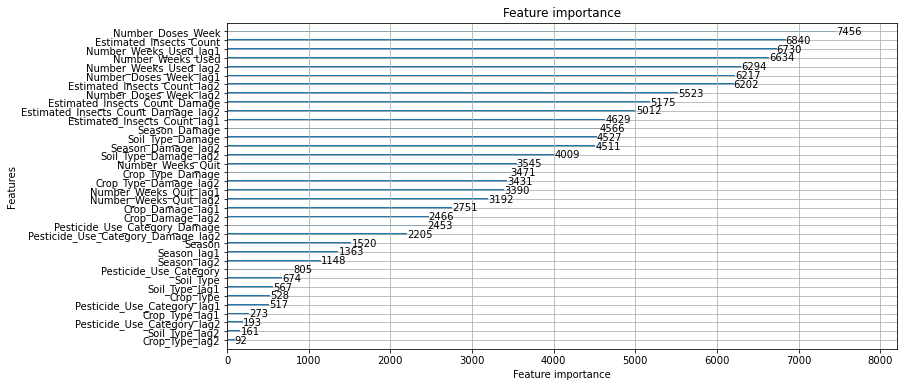

In [42]:
plt.rcParams['figure.figsize'] = (12, 6)
lgb.plot_importance(clf)
plt.show()